# Using the OpenAI API (GPT-4o Multimodal)

- Author: [Erika Park](https://www.linkedin.com/in/yeonseo-park-094193198/)
- Peer Review: 
- Proofread:
- This is a part of [LangChain Open Tutorial](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/01-Basic/05-Using-OpenAIAPI-MultiModal.ipynb) [![Open in GitHub](https://img.shields.io/badge/Open%20in%20GitHub-181717?style=flat-square&logo=github&logoColor=white)](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/01-Basic/05-Using-OpenAIAPI-MultiModal.ipynb)

## Overview

This tutorial explains how to effectively use OpenAI's `GPT-4o` multimodal model with `LangChain`, a versatile framework for building language model applications. You'll learn to set up and work with the `ChatOpenAI` object for tasks such as generating responses, analyzing model outputs, and leveraging advanced features like real-time response streaming and token log probability analysis. By the end of this guide, you'll have the tools to experiment with and deploy sophisticated AI solutions smoothly and efficiently.


### Table of Contents

- [Overview](#overview)
- [Environment Setup](#environment-setup)
- [ChatOpenAI GPT-4o Multimodal](#chatopenai-gpt-4o-multimodal)
- [Multimodal AI: Text and Image Processing with GPT-4o](#multimodal-ai-text-and-image-processing-with-gpt-4o)
- [Configuring Multimodal AI with System and User Prompts](#configuring-multimodal-ai-with-system-and-user-prompts)


### References

- [OpenAI Model Overview](https://platform.openai.com/docs/models)

----

## Environment Setup

Set up the environment. You may refer to [Environment Setup](https://wikidocs.net/257836) for more details.

**[Note]**
- `langchain-opentutorial` is a package that provides a set of easy-to-use environment setup, useful functions, and utilities for tutorials. 
- You can checkout out the [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [2]:
# Install required packages
from langchain_opentutorial import package

package.install(
    ["langchain", "langchain_openai"],
    verbose=False,
    upgrade=False,
)

In [3]:
# Set environment variables
from langchain_opentutorial import set_env

set_env(
    {
        # "OPENAI_API_KEY": "",
        # "LANGCHAIN_API_KEY": "",
        "LANGCHAIN_TRACING_V2": "true",
        "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
        "LANGCHAIN_PROJECT": "Using-OpenAI-API",
    }
)

Environment variables have been set successfully.


You can alternatively set API keys such as `OPENAI_API_KEY` in a `.env` file and load them.

[Note] This is not necessary if you've already set the required API keys in previous steps.

In [4]:
# Configuration file to manage the API KEY as an environment variable
from dotenv import load_dotenv

# Load API KEY information
load_dotenv(override=True)

True

## ChatOpenAI GPT-4o Multimodal

This is a chat-specific Large Language Model (LLM) provided by OpenAI.

When creating an object, the following options can be specified. Details about the options are as follows:

`temperature`

- Specifies the sampling temperature, which can be chosen between 0 and 2. A higher value, such as 0.8, results in more random outputs, while a lower value, such as 0.2, makes the outputs more focused and deterministic.

`max_tokens`

- The maximum number of tokens to generate for the chat completion.

`model_name` : List of available models
- `gpt-4o`
- `gpt-4o-mini`
- `o1-preview`, `o1-preview-mini` : Available only for Tier 5 accounts, which require a minimum recharge of $1,000 to access.

![gpt-models.png](./assets/04-using-openai-api-gpt4o-get-models.png)

- Link: https://platform.openai.com/docs/models



In [5]:
from langchain_openai.chat_models import ChatOpenAI

# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1,  # Creativity (range: 0.0 ~ 2.0)
    model_name="gpt-4o-mini",  # Model name
)

question = "What is the capital of USA?"

print(f"[Answer]: {llm.invoke(question)}")

[Answer]: content='The capital of the United States is Washington, D.C.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 14, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None} id='run-513b84b7-4d52-4256-9af1-1713ba4f4930-0' usage_metadata={'input_tokens': 14, 'output_tokens': 13, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


### Response Format (AI Message)
When using the `ChatOpenAI` object, the response is returned in the format of an AI Message. This includes the text content generated by the model along with any metadata or additional properties associated with the response. These provide structured information about the AI's reply and how it was generated.

**Key Components of AI Message**
1. **`content`**  
   - **Definition:** The primary response text generated by the AI.  
   - **Example:** **"The capital of South Korea is Seoul."**
   - **Purpose:** This is the main part of the response that users interact with.

2. **`response_metadata`**  
   - **Definition:** Metadata about the response generation process.  
   - **Key Fields:**
     - **`model_name` :** Name of the model used (e.g., `"gpt-4o-mini"` ).
     - **`finish_reason` :** Reason the generation stopped (**stop** for normal completion).
     - **`token_usage` :** Token usage details:
       - **`prompt_tokens` :** Tokens used for the input query.
       - **`completion_tokens` :** Tokens used for the response.
       - **`total_tokens` :** Combined token count.

3. **`id`**  
   - **Definition:** A unique identifier for the API call.  
   - **Purpose:** Useful for tracking or debugging specific interactions.

In [6]:
# Query content
question = "What is the capital of USA?"

# Query
response = llm.invoke(question)
response

AIMessage(content='The capital of the United States is Washington, D.C.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 14, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': None}, id='run-16669141-7244-4cf4-91dd-8c3f1efc8d24-0', usage_metadata={'input_tokens': 14, 'output_tokens': 13, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
# Extract key components
content = response.content  # AI's response text
model_name = response.response_metadata["model_name"]
total_tokens = response.response_metadata["token_usage"]["total_tokens"]

# Print results
print(f"Response: {content}")
print(f"Model: {model_name}")
print(f"Total Tokens Used: {total_tokens}")

Response: The capital of the United States is Washington, D.C.
Model: gpt-4o-mini-2024-07-18
Total Tokens Used: 27


### Activating `LogProb`

`LogProb` represents the **logarithmic probabilities** assigned by the model to predicted tokens. A token is an individual unit of text, such as a word, character, or part of a word. The probability indicates the **model's confidence in predicting each token**.

**Use Cases**:
`LogProb` is useful for evaluating the model's prediction confidence, debugging issues, and optimizing prompts. By analyzing `LogProb` data, you can understand why the model selected specific tokens.

**Caution**:
Enabling `LogProb` increases the response data size, which may affect API speed and cost. It is recommended to activate it only when necessary.

In [8]:
# Object creation with LogProb enabled
llm_with_logprob = ChatOpenAI(
    temperature=0.1, max_tokens=2048, model_name="gpt-4o-mini"
).bind(
    logprobs=True
)  # Activating LogProb to retrieve token-level probabilities

In [9]:
# Query content
question = "What is the capital of India?"

# Query
response = llm_with_logprob.invoke(question)

# Display the response metadata
print(response.response_metadata)

{'token_usage': {'completion_tokens': 9, 'prompt_tokens': 14, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'stop', 'logprobs': {'content': [{'token': 'The', 'bytes': [84, 104, 101], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' capital', 'bytes': [32, 99, 97, 112, 105, 116, 97, 108], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' of', 'bytes': [32, 111, 102], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' India', 'bytes': [32, 73, 110, 100, 105, 97], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' is', 'bytes': [32, 105, 115], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' New', 'bytes': [32, 78, 101, 119], 'logprob': -3.7742768e-05, 'top_logprobs': []}, {'token': ' Delhi', 'bytes': [32, 68, 101, 108, 10

### Streaming Output

The streaming option is particularly useful for receiving real-time responses to queries.

Instead of waiting for the entire response to be generated, the model streams the output token by token or in chunks, enabling faster interaction and immediate feedback.

In [10]:
answer = llm.stream(
    "Please provide 10 beautiful tourist destinations in USA along with their addresses!"
)

# Streaming real-time output
for token in answer:
    print(token.content, end="", flush=True)

Sure! Here are 10 beautiful tourist destinations in the USA along with their addresses:

1. **Grand Canyon National Park**
   - Address: Grand Canyon Village, AZ 86023

2. **Yosemite National Park**
   - Address: 9035 Village Dr, Yosemite Valley, CA 95389

3. **Yellowstone National Park**
   - Address: 2 J. G. P. Rd, Yellowstone National Park, WY 82190

4. **Niagara Falls**
   - Address: Niagara Falls, NY 14303

5. **Maui, Hawaii**
   - Address: Maui, HI (specific locations vary, e.g., Lahaina, Kihei)

6. **Sedona, Arizona**
   - Address: Sedona, AZ 86336

7. **Savannah, Georgia**
   - Address: Savannah, GA 31401 (Historic District)

8. **New Orleans, Louisiana**
   - Address: New Orleans, LA 70112 (French Quarter)

9. **Acadia National Park**
   - Address: 20 McFarland Hill Dr, Bar Harbor, ME 04609

10. **Washington, D.C. (National Mall)**
    - Address: 900 Ohio Dr SW, Washington, DC 20024

These destinations offer stunning natural beauty, rich history, and unique cultural experience

## Multimodal AI: Text and Image Processing with GPT-4o

Multimodal refers to technologies or approaches that integrate and process multiple types of information (modalities). This includes a variety of data types such as:

- Text: Information in written form, such as documents, books, or web pages.
- Image: Visual information, including photos, graphics, or illustrations.
- Audio: Auditory information, such as speech, music, or sound effects.
- Video: A combination of visual and auditory information, including video clips or real-time streaming.

`gpt-4o` and `gpt-4-turbo` are equipped with vision capabilities, enabling them to process and recognize images alongside textual inputs. 

### Step 1. Setting up ChatOpenAI

First, create a `ChatOpenAI` object with the `gpt-4o` model and streaming capabilities enabled.

In [11]:
# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o",
    streaming=True,  # Enable streaming for real-time output
)

### Step 2. Encoding Images
Images need to be encoded into **Base64** format for the model to process them. The following function handles both URL-based and local image files:

In [12]:
import requests
import base64
import mimetypes
from IPython.display import display, HTML, Image


def encode_image(image_path_or_url):
    if image_path_or_url.startswith("http://") or image_path_or_url.startswith(
        "https://"
    ):
        # Download image from URL
        response = requests.get(image_path_or_url)
        if response.status_code == 200:
            image_content = response.content
        else:
            raise Exception(f"Failed to download image: {response.status_code}")
        # Guess MIME type based on URL
        mime_type, _ = mimetypes.guess_type(image_path_or_url)
        if mime_type is None:
            mime_type = (
                "application/octet-stream"  # Default MIME type for unknown files
            )
    else:
        # Read image from local file
        try:
            with open(image_path_or_url, "rb") as image_file:
                image_content = image_file.read()
            # Guess MIME type based on file extension
            mime_type, _ = mimetypes.guess_type(image_path_or_url)
            if mime_type is None:
                mime_type = (
                    "application/octet-stream"  # Default MIME type for unknown files
                )
        except FileNotFoundError:
            raise Exception(f"File not found: {image_path_or_url}")

    # Base64 encode the image
    return f"data:{mime_type};base64,{base64.b64encode(image_content).decode()}"

**Example: Encode and Display an Image** 

* URL-based Image:


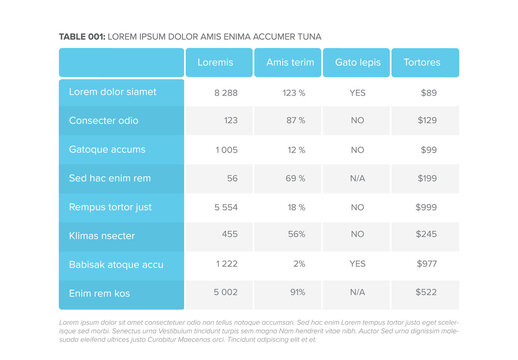

In [13]:
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"
encoded_image_url = encode_image(IMAGE_URL)
display(Image(url=encoded_image_url))  # Display the image

* Local Image:


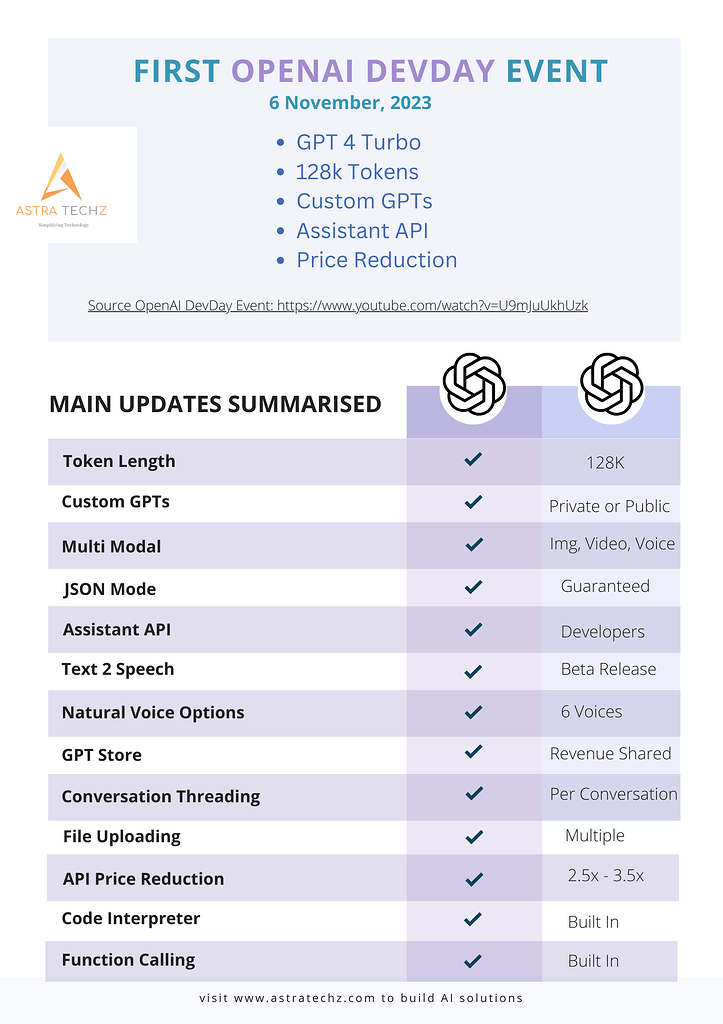

In [14]:
IMAGE_PATH = "./assets/04-using-openai-api-gpt4o-sample-image.png"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))  # Display the image

### Step 3: Creating Messages
Define a function to generate the messages required for the model. This includes:

- **System Prompt**: Defines the role and task for the AI.
- **User Prompt**: Provides the specific task instructions.
- **Encoded Image**: Includes the Base64 image data.

In [15]:
# Function to create messages for the AI
def create_messages(encoded_image):
    system_prompt = "You are a helpful assistant on parsing images."
    user_prompt = "Explain the given images in-depth."
    return [
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": user_prompt},
                {"type": "image_url", "image_url": {"url": encoded_image}},
            ],
        },
    ]

### Step 4: Model Interaction
Now, send the generated messages to the model and stream the results in real time.

In [16]:
def stream_response(llm, messages):
    response = llm.stream(messages)  # Stream AI response
    print("Streaming response:")
    for chunk in response:
        print(
            chunk.content, end="", flush=True
        )  # Print each response chunk in real time

In [17]:
# Display the image
display(Image(url=IMAGE_URL))
encoded_image_url = encode_image(IMAGE_URL)

#  Create messages and stream responses
messages_url = create_messages(encoded_image_url)
stream_response(llm, messages_url)

Streaming response:
The image is a table with a header labeled "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA." It contains five columns with the following headings:

1. **Loremis**
2. **Amis terim**
3. **Gāto lepis**
4. **Tortores**

Each row under these headings contains various data points:

- **Lorem dolor siamet**: 8,288, 123%, YES, $89
- **Consecter odio**: 123, 87%, NO, $129
- **Gatoque accums**: 1,005, 12%, NO, $199
- **Sed hac enim rem**: 56, 69%, N/A, $199
- **Rempus tortor just**: 5,554, 18%, NO, $999
- **Klimas nsecter**: 455, 56%, NO, $245
- **Babiask atoque accu**: 1,222, 2%, YES, $977
- **Enim rem kos**: 5,002, 91%, N/A, $522

The table uses placeholder text ("Lorem ipsum") for both the title and the row labels, which is commonly used in design to fill space until actual content is available. The data appears to be numerical and categorical, with percentages, binary options (YES/NO), and monetary values. The last row of text is a continuation of the placeholder te


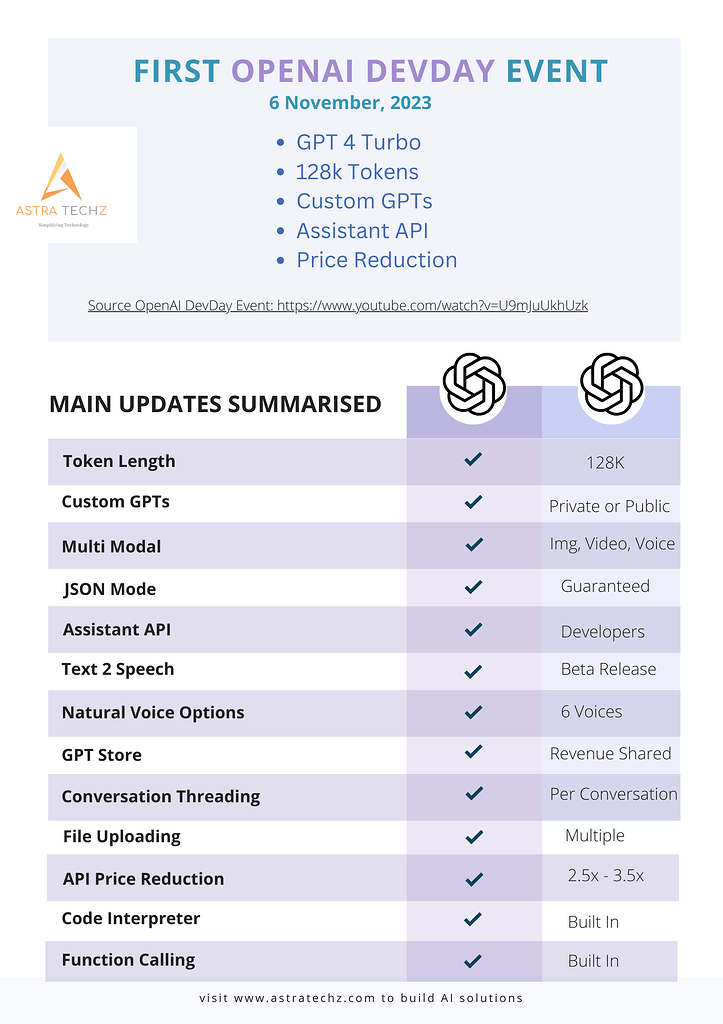

Streaming response:
The image is an informational poster about the "First OpenAI DevDay Event" held on November 6, 2023. It highlights several key updates and features introduced during the event. Here's a detailed breakdown:

### Event Details:
- **Title:** First OpenAI DevDay Event
- **Date:** November 6, 2023
- **Key Announcements:**
  - GPT 4 Turbo
  - 128k Tokens
  - Custom GPTs
  - Assistant API
  - Price Reduction

### Source:
- A YouTube link is provided for more information: [OpenAI DevDay Event](https://www.youtube.com/watch?v=U9mjJuUkhUzk)

### Main Updates Summarized:
1. **Token Length:** 
   - Increased to 128K tokens.
   
2. **Custom GPTs:**
   - Available as private or public options.
   
3. **Multi Modal:**
   - Supports image, video, and voice inputs.
   
4. **JSON Mode:**
   - Guaranteed functionality.
   
5. **Assistant API:**
   - Available for developers.
   
6. **Text to Speech:**
   - In beta release.
   
7. **Natural Voice Options:**
   - Offers 6 different voic

In [18]:
# Encoding image
IMAGE_PATH = "./assets/04-using-openai-api-gpt4o-sample-image.png"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))

# Create messages and stream responses
messages_file = create_messages(encoded_image_file)
stream_response(llm, messages_file)

## Configuring Multimodal AI with System and User Prompts
This tutorial demonstrates how to configure a multimodal AI using **system prompts** and **user prompts**, and how to process and interpret an image-based financial table.


### What Are Prompts? 

**System Prompt**
Defines the AI's identity, responsibilities, and behavior for the session:

* Sets the AI's context, ensuring consistent responses.
* Example: "You are a financial assistant specializing in interpreting tables."

**User Prompt**
Gives task-specific instructions to guide the AI:

* Specifies what the user expects the AI to do.
* Example: "Analyze this financial table and summarize the insights."

### Step 1: Set Up the ChatOpenAI Object
The `ChatOpenAI` object initializes the model with the desired configurations, such as temperature and model type.

In [19]:
# Create the ChatOpenAI object
llm = ChatOpenAI(temperature=0.1, model_name="gpt-4o", streaming=True)

### Step2: Encode and Display the Image
Images need to be encoded into Base64 format so the AI can process them. 


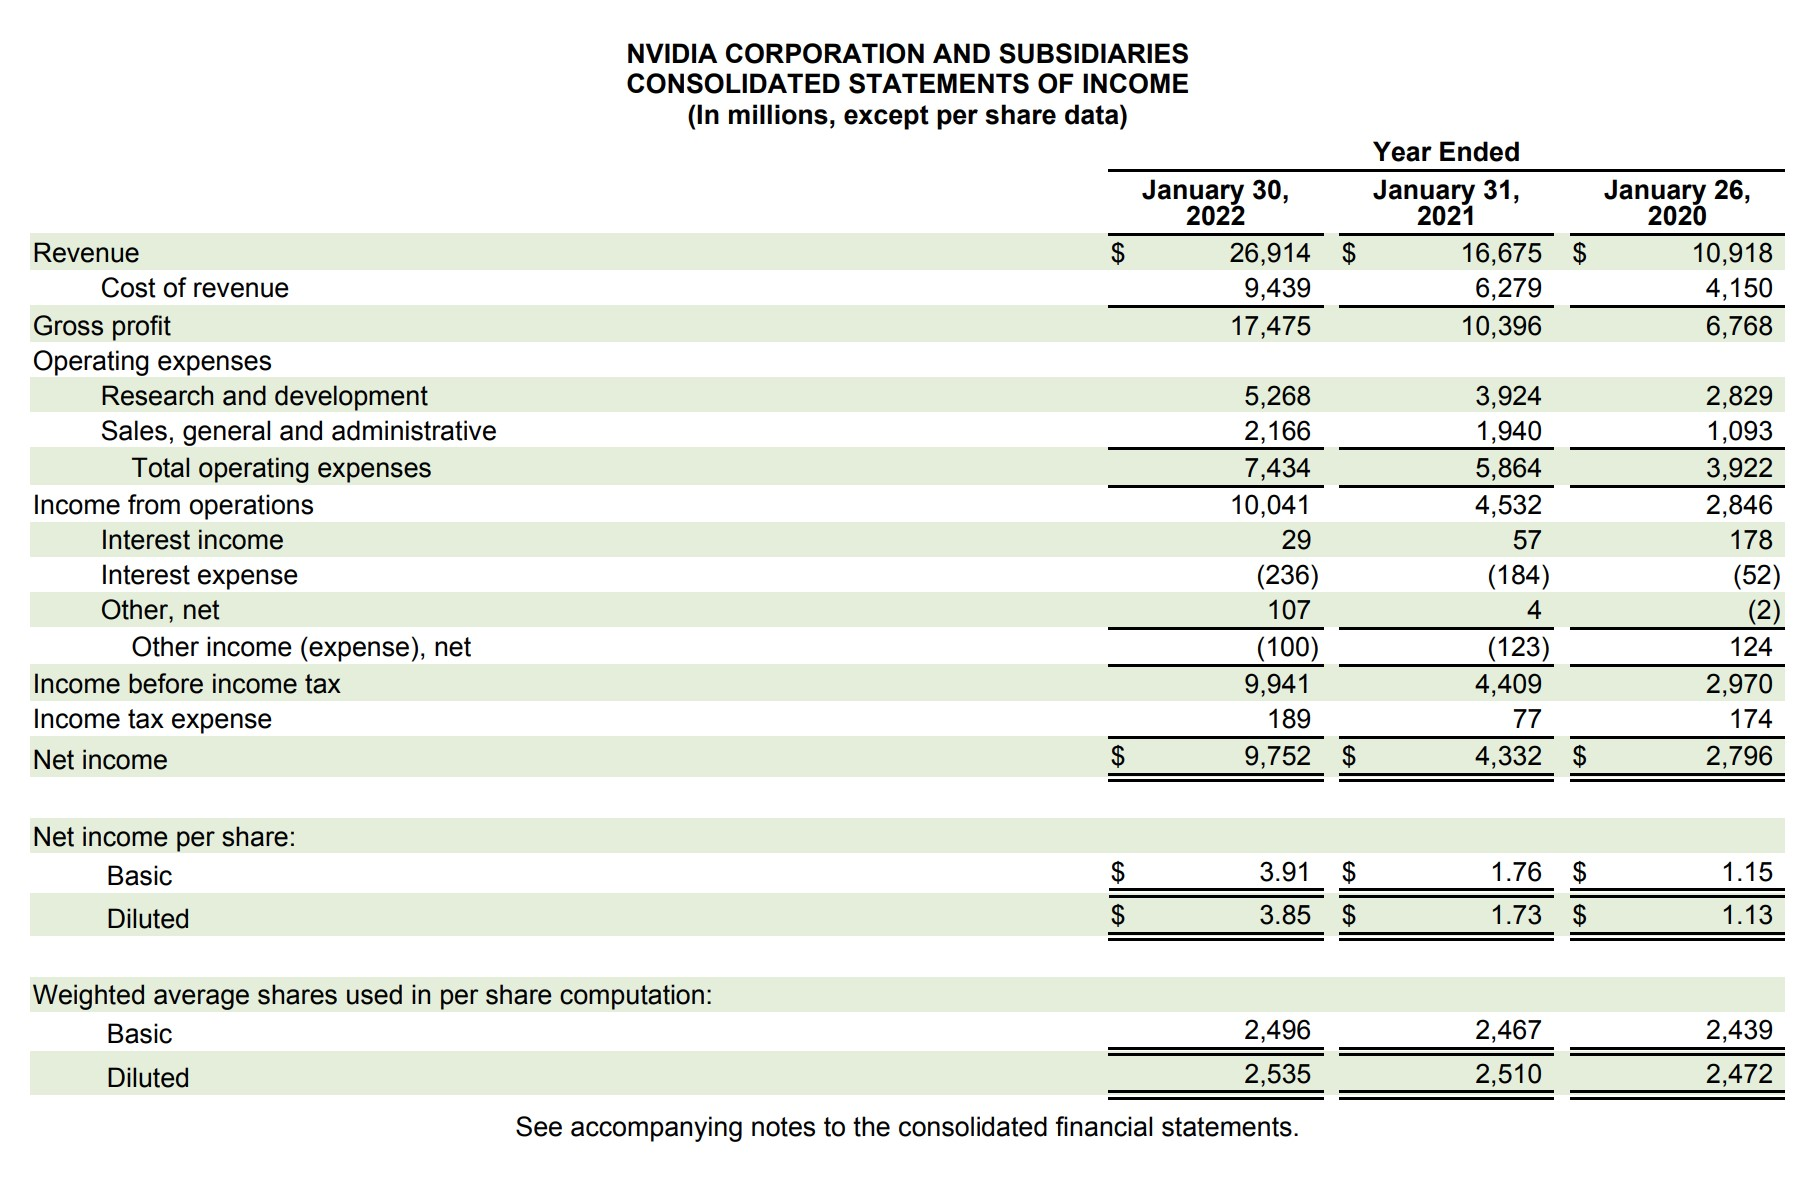

In [20]:
IMAGE_URL = "https://media.wallstreetprep.com/uploads/2022/05/24100154/NVIDIA-Income-Statement.jpg?_gl=1*zqx63z*_gcl_au*MTI3Njg2MTE3Mi4xNzM1NDg1OTky*_ga*Mjg1MjY3NTAzLjE3MzU0ODU5OTI.*_ga_0X18K5P59L*MTczNTQ4NTk5MS4xLjAuMTczNTQ4NTk5MS42MC4wLjE1OTkyODA0MTI."

encoded_image_url = encode_image(IMAGE_URL)
display(Image(url=encoded_image_url))  # Display the original image.

### Step 3: Define System and User Prompts
Set up the prompts to guide the AI’s behavior and task execution.

In [21]:
# System prompt: Describe the AI's role and responsibilities
system_prompt = """You are a financial AI assistant specializing in interpreting tables (financial statements).
Your mission is to analyze the provided table-format financial statements and summarize interesting insights in a friendly and clear manner."""

# User prompt: Provide instructions for the task
user_prompt = """The table provided to you represents a company's financial statements. Summarize the interesting insights from the table."""

### Step 4: Create Messages for the AI
Combine the system prompt, user prompt, and the encoded image into a structured message format.

In [22]:
messages = [
    {"role": "system", "content": system_prompt},
    {
        "role": "user",
        "content": [
            {"type": "text", "text": user_prompt},
            {"type": "image_url", "image_url": {"url": encoded_image_url}},
        ],
    },
]

### Step 5: Stream the AI's Response
Use the AI model to process the messages and stream the results in real time.

In [23]:
def stream_response(llm, messages):
    response = llm.stream(messages)  # Stream AI response
    print("Streaming response:")
    for chunk in response:
        print(
            chunk.content, end="", flush=True
        )  # Print each response chunk in real time


# Execute streaming
stream_response(llm, messages)

Streaming response:
Here's a summary of the financial insights from the table:

1. **Revenue Growth**: The company experienced significant revenue growth over the three years. Revenue increased from $10,918 million in 2020 to $26,914 million in 2022, showing strong business expansion.

2. **Gross Profit Increase**: Gross profit also rose substantially, from $6,768 million in 2020 to $17,475 million in 2022, indicating improved profitability and efficient cost management.

3. **Operating Expenses**: Operating expenses increased over the years, with research and development costs rising from $2,829 million in 2020 to $5,268 million in 2022. This suggests a focus on innovation and product development.

4. **Net Income Growth**: Net income saw a remarkable increase, more than tripling from $2,796 million in 2020 to $9,752 million in 2022. This reflects overall improved financial performance.

5. **Earnings Per Share (EPS)**: Both basic and diluted EPS showed significant growth. Basic EPS i